<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>



In [ ]:
#kaggle: place ~28 мб уже ниже
#score: 0.85168
#Валерия_Мысленкова

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [70]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [244]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

# Первая часть. Исследование.

In [245]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [246]:
data = pd.read_csv('/content/drive/My Drive/DLS_домашка/train.csv')

In [247]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
363,8,81.25,585.95,Male,1,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,1
427,72,111.60,8012.75,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
4777,18,19.65,391.7,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
3966,1,18.80,18.8,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
5222,32,61.40,1864.65,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),0


In [248]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [249]:
data.tail()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
5281,19,75.90,1375.6,Female,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0


In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [251]:
data.isna().sum() #нет незаполненных значений, ничего заменять не нужно

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [252]:
#проверяем
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [253]:
data.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


In [254]:
data.describe(include=[np.object]) #видим, что TotalSpent - имеет тип object, хотя по описанию указан, как числовой

,TotalSpent,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
count,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282
unique,4978,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,9,2655,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786


In [255]:
print(data['TotalSpent'].value_counts()) # видим пробелы в значении

           9
20.2       9
19.75      8
19.65      6
20.05      6
19.9       5
75.3       4
70.6       4
45.3       4
20.4       4
20.45      4
50.15      4
19.95      4
20.15      4
19.45      4
69.65      4
35.9       3
69.1       3
44         3
19.4       3
70.1       3
49.9       3
20.5       3
19.55      3
69.9       3
19.1       3
74.35      3
85.5       3
74.6       3
69.6       3
70.15      3
20         3
80.55      3
20.3       3
19.2       3
70.45      3
19.3       3
20.35      3
20.9       3
75.35      3
45.1       3
74.9       3
24.8       3
19.85      3
86.05      3
69.95      2
45.05      2
128.6      2
19.5       2
50.8       2
477.55     2
1183.05    2
82.85      2
196.75     2
5969.3     2
44.45      2
63.75      2
52         2
55.7       2
93.55      2
5682.25    2
511.25     2
99.75      2
460.25     2
69.55      2
74.3       2
238.5      2
44.15      2
475.1      2
162.45     2
19.25      2
1734.5     2
44.9       2
1873.7     2
264.8      2
867.3      2
1046.5     2

In [256]:
data['TotalSpent'] = data['TotalSpent'].replace(' ', 0)
#заменяем пробелы на 0, т.к. в этих столбца ClientPeriod=0, это новые клиенты

In [257]:
#Приводим TotalSpent к числовому виду
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

In [258]:
pd.options.display.max_rows =None #изменяем, чтобы видеть все строки при переборе

In [259]:
for el in data.columns:
    print(data[el].value_counts())

1     457
72    284
2     165
3     162
4     136
71    131
7     103
5      97
70     96
12     92
9      91
8      91
10     87
11     80
67     78
6      76
24     75
15     74
18     74
13     71
22     68
17     68
68     67
35     64
23     63
66     62
56     61
69     61
32     60
52     60
63     59
25     59
19     58
27     57
64     57
46     56
26     55
58     55
30     55
65     54
29     54
54     54
20     53
61     53
47     53
60     53
16     53
14     53
34     53
43     52
50     52
48     51
51     51
62     51
33     51
31     51
53     51
42     50
59     49
41     49
45     49
40     49
55     48
37     47
38     46
28     46
21     45
49     45
57     39
39     35
36     34
44     34
0       9
Name: ClientPeriod, dtype: int64
20.05     46
19.65     35
19.95     34
20.00     33
19.80     32
19.70     32
19.90     31
19.85     30
20.20     30
20.10     29
19.55     29
19.75     29
20.35     27
20.15     27
19.60     27
19.50     25
20.25     25
20.45     23
20.

Анализ числовых признаков

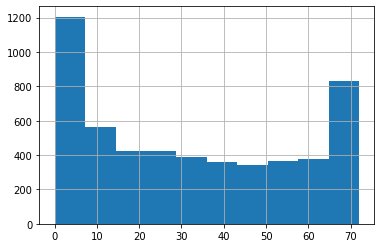

In [260]:
data['ClientPeriod'].hist()

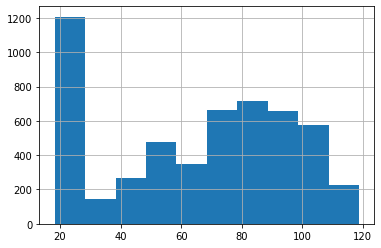

In [261]:
data['MonthlySpending'].hist()

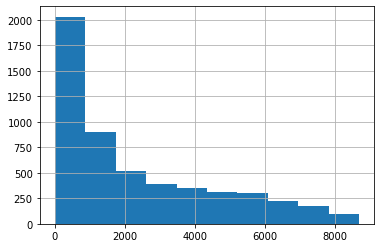

In [262]:
data['TotalSpent'].hist()

{'boxes': [<matplotlib.lines.Line2D at 0x7f2594452cc0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f259424b630>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f25944d0fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f25944d03c8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f259424b9b0>,
  <matplotlib.lines.Line2D at 0x7f259424bf98>]}

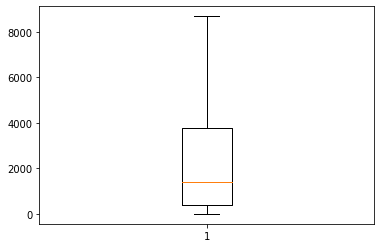

In [263]:
plt.boxplot(data['TotalSpent'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f25940c7518>],
 'caps': [<matplotlib.lines.Line2D at 0x7f25940d85c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2594516780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f25945164e0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f25941302e8>,
  <matplotlib.lines.Line2D at 0x7f25940d8860>]}

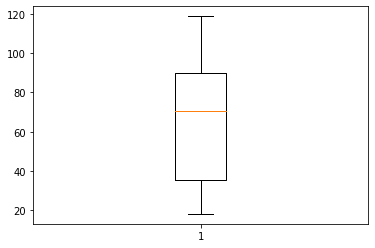

In [264]:
plt.boxplot(data['MonthlySpending'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f25940dea58>],
 'caps': [<matplotlib.lines.Line2D at 0x7f259401d748>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f25944cb8d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f25944cbf28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f25940de748>,
  <matplotlib.lines.Line2D at 0x7f25940deac8>]}

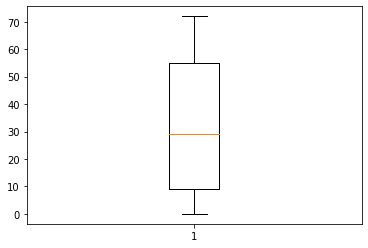

In [265]:
plt.boxplot(data['ClientPeriod'])


In [266]:
#Категориальные признаки - анализ

Sex
Male      2655
Female    2627
Name: Sex, dtype: int64


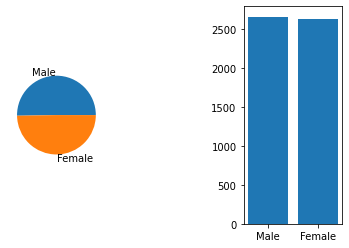

IsSeniorCitizen
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64


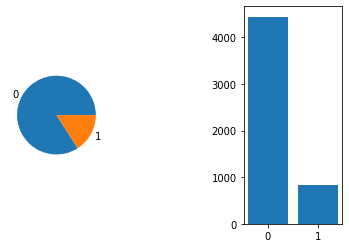

HasPartner
No     2705
Yes    2577
Name: HasPartner, dtype: int64


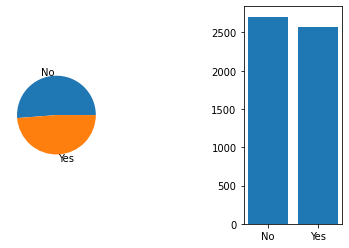

HasChild
No     3676
Yes    1606
Name: HasChild, dtype: int64


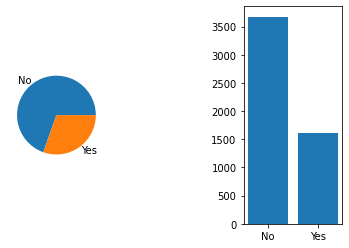

HasPhoneService
Yes    4761
No      521
Name: HasPhoneService, dtype: int64


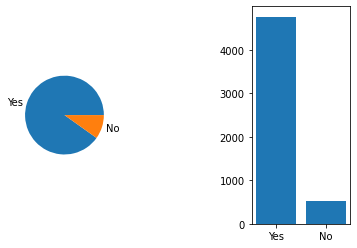

HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64


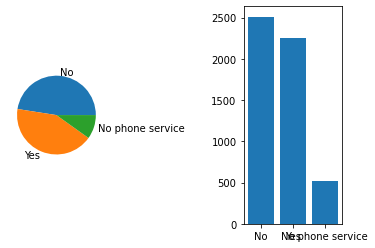

HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64


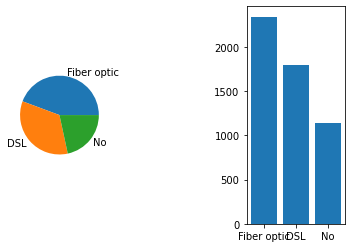

HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64


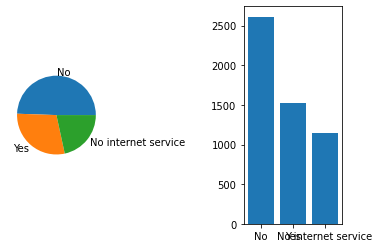

HasOnlineBackup
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64


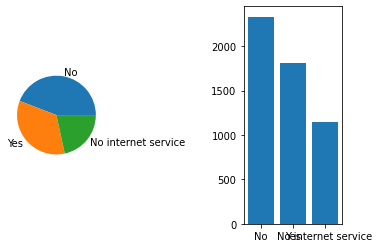

HasDeviceProtection
No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64


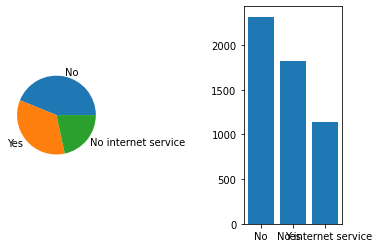

HasTechSupportAccess
No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess, dtype: int64


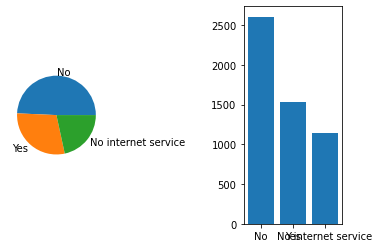

HasOnlineTV
No                     2099
Yes                    2042
No internet service    1141
Name: HasOnlineTV, dtype: int64


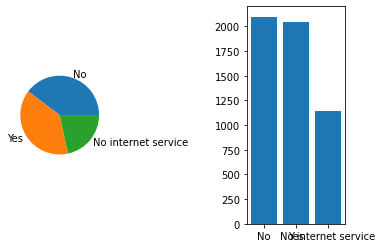

HasMovieSubscription
No                     2081
Yes                    2060
No internet service    1141
Name: HasMovieSubscription, dtype: int64


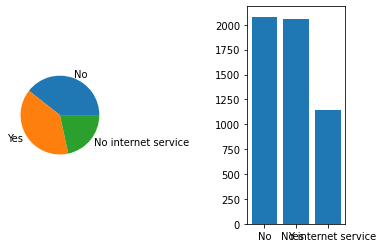

HasContractPhone
Month-to-month    2920
Two year          1280
One year          1082
Name: HasContractPhone, dtype: int64


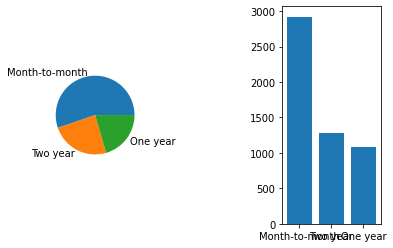

IsBillingPaperless
Yes    3148
No     2134
Name: IsBillingPaperless, dtype: int64


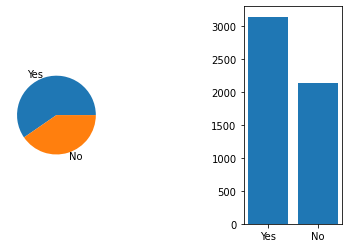

PaymentMethod
Electronic check             1786
Mailed check                 1194
Bank transfer (automatic)    1159
Credit card (automatic)      1143
Name: PaymentMethod, dtype: int64


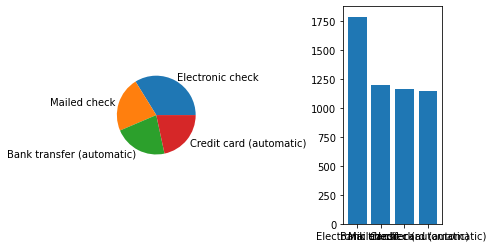

In [267]:
i = 1
for el in cat_cols:
    print(el)
    print(data[el].value_counts())
    plt.subplot(1, 3, 1), plt.pie(data[el].value_counts(), labels=data[el].value_counts().index)
    plt.subplot(1, 3, 3), plt.bar(data[el].value_counts().index, data[el].value_counts())
    plt.show()
    i += 1


In [268]:
import seaborn as sns

Пункт 2

In [269]:
data['Churn'].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

([<matplotlib.patches.Wedge at 0x7f2594247400>,
 [Text(-0.7478930722742168, 0.8066324766857789, '0'),
  Text(0.7478930722742166, -0.8066324766857789, '1')])

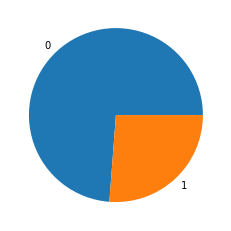

In [270]:
plt.pie(data['Churn'].value_counts(), labels=data['Churn'].value_counts().index)

In [271]:
#Всего в выборке 2 класса - при этом 1 класс в 4 раза 
#больше другого, следовательно можно сделать вывод, что классы достаточно сбалансированны

Пункт 3

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


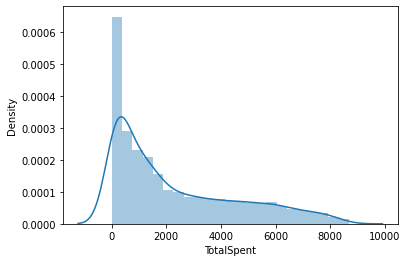

In [272]:
sns.distplot(data['TotalSpent'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


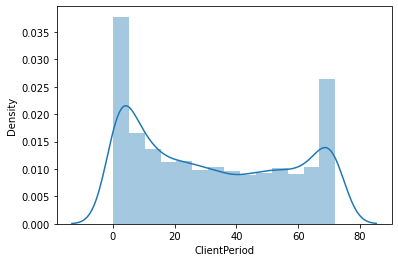

In [273]:
sns.distplot(data['ClientPeriod']) 
#в данной ситуации возможно бимодальное распределение, или наличие обобщающего варианта ответа: меньше 0/больше 70

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


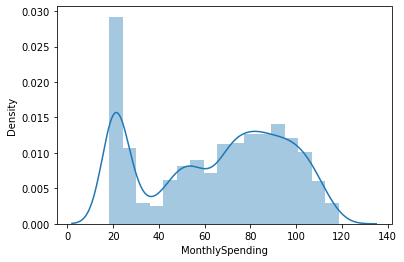

In [274]:
sns.distplot(data['MonthlySpending'])

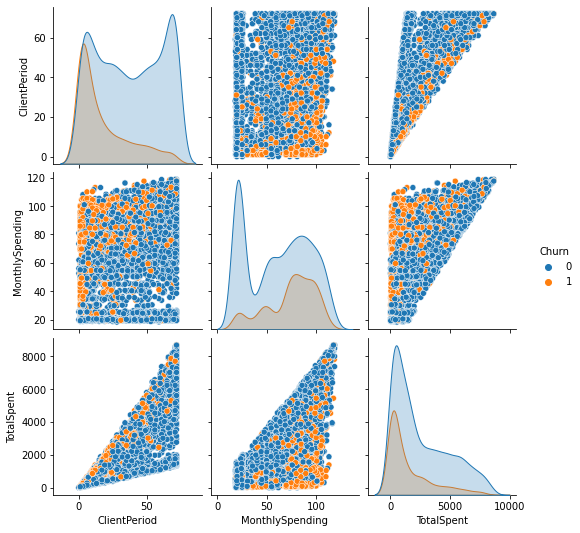

In [275]:
sns.pairplot(pd.concat([data[num_cols], data['Churn']], axis=1), hue='Churn')

plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [276]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

In [195]:
#обработка данных для логистической регрессии

In [196]:
names = data.columns

In [197]:
data.columns

Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Sex',
       'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod', 'Churn'],
      dtype='object')

In [198]:
#Разделение на test и train перед стандартизацией, чтобы не произошло утечки данных

In [280]:
X_train, X_valid, y_train, y_valid = train_test_split(data[names[:-1]], data[names[-1]], train_size=0.8, random_state=24)

In [281]:
# YOUR CODE

#Стандартизация - one-hot кодирование
dummy_features = pd.get_dummies(X_train[cat_cols])
train = pd.concat([X_train[num_cols], dummy_features], axis=1)
scaler = RobustScaler()
train = scaler.fit_transform(train)
#tr = scaler.fit_transform(X_train[num_cols])
#X_test_scaled = scaler.transform(X_test)

In [282]:
dummy_features = pd.get_dummies(X_valid[cat_cols])
valid = pd.concat([X_valid[num_cols], dummy_features], axis=1)
scaler = RobustScaler()
valid = scaler.fit_transform(valid)

In [283]:
#Обучение и подбор гиперпараметров

In [284]:
#Используем  LogisticRegressionCV, не подбираем параметры, как указано в описании пункта

In [285]:
model = LogisticRegressionCV(max_iter=200, scoring='roc_auc', refit=True, random_state=42)

In [286]:
m1 = model.fit(train, y_train)

In [287]:
k = m1.predict_proba(valid)[:, 1]

In [288]:
k1 = m1.predict_proba(train)[:, 1]

In [289]:
roc_auc_score(y_train, k1)

0.8475296759704846

In [290]:
roc_auc_score(y_valid, k) #приемлемое качество модели

0.8540959193898569

In [291]:
#Подбор гипер-параметров с помощью кросс-валидации

In [292]:
X_train_CV, y_train_CV = data[names[:-1]], data[names[-1]]

In [293]:
grids = np.array([100, 10, 1, 0.1, 0.01, 0.001])
parameters = {'logisticregression__C': grids}
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])
numeric_transformer = Pipeline(steps=[('scaler', RobustScaler())])
preprocessor = ColumnTransformer(transformers=[
    ('numeric_transformer', numeric_transformer, num_cols),
    ('categorical_transformer', categorical_transformer, cat_cols)
])
cls = make_pipeline(preprocessor,
    LogisticRegression(max_iter=200))

CV_model = GridSearchCV(estimator=cls, 
                            param_grid=parameters,
                            cv=10, 
                            scoring='roc_auc',
                            n_jobs=-1, 
                            verbose=10)
CV_model.fit(X_train_CV, y_train_CV)
means = CV_model.cv_results_['mean_test_score']
error = CV_model.cv_results_['std_test_score']

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.3s finished


In [294]:
#Параметры
CV_model.best_params_ #лучшее С

{'logisticregression__C': 100.0}

In [295]:
y_test_predicted = CV_model.predict_proba(X_valid)[:, 1]
test_auc = roc_auc_score(y_valid, y_test_predicted)

In [296]:
test_auc #лучшее качество модели

0.8554783907662046

In [297]:
#Качество
CV_model.best_score_ 

0.844950860162864

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [219]:
# YOUR CODE
X_train, X_valid, y_train, y_valid = train_test_split(data[names[:-1]], data[names[-1]], train_size=0.8, random_state=24)

In [220]:
!pip install catboost

In [221]:
import catboost

In [222]:
#тестируем со стандартными параметрами
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols)
boosting_model.fit(X_train, y_train)
y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_valid)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_valid, y_test_predicted)

Learning rate set to 0.019062
0:	learn: 0.6807341	total: 16.9ms	remaining: 16.9s
1:	learn: 0.6693341	total: 30.3ms	remaining: 15.1s
2:	learn: 0.6581407	total: 44.3ms	remaining: 14.7s
3:	learn: 0.6468273	total: 58.8ms	remaining: 14.6s
4:	learn: 0.6360463	total: 84ms	remaining: 16.7s
5:	learn: 0.6269045	total: 96.2ms	remaining: 15.9s
6:	learn: 0.6175219	total: 111ms	remaining: 15.8s
7:	learn: 0.6091284	total: 124ms	remaining: 15.4s
8:	learn: 0.6009435	total: 138ms	remaining: 15.2s
9:	learn: 0.5931201	total: 150ms	remaining: 14.9s
10:	learn: 0.5848666	total: 168ms	remaining: 15.1s
11:	learn: 0.5773670	total: 183ms	remaining: 15.1s
12:	learn: 0.5701189	total: 204ms	remaining: 15.5s
13:	learn: 0.5630993	total: 222ms	remaining: 15.6s
14:	learn: 0.5564621	total: 237ms	remaining: 15.5s
15:	learn: 0.5505470	total: 245ms	remaining: 15.1s
16:	learn: 0.5445100	total: 259ms	remaining: 14.9s
17:	learn: 0.5391074	total: 273ms	remaining: 14.9s
18:	learn: 0.5335334	total: 288ms	remaining: 14.9s
19:	lea

In [223]:
print(train_auc)
print(test_auc)

0.889846382189669
0.8489441258884002


In [224]:
#2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.
#работает долго\
tmp = -1
num = -1
ll = -1
lr = 0.01
n_e = 50
while lr <=0.05:
    while n_e <= 300:
        boosting_model = catboost.CatBoostClassifier(n_estimators=n_e,
                                                     cat_features=cat_cols,silent=True,
                                                     learning_rate=lr,
                                                     eval_metric='AUC',
                                                     random_seed=42)
        boosting_model.fit(X_train, y_train)
        y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
        y_test_predicted = boosting_model.predict_proba(X_valid)[:, 1]
        train_auc = roc_auc_score(y_train, y_train_predicted)
        test_auc = roc_auc_score(y_valid, y_test_predicted)
        if (tmp == -1) | (tmp < test_auc):
            tmp = test_auc
            num = n_e
            ll = lr
        n_e += 50
    n_e = 50
    lr+=0.01

In [225]:
print(tmp)
print(num)
print(ll)

0.8563227189222291
150
0.05


In [ ]:
#чем больше learning rate  тем меньше качество на тесте если lr > 0.05
#если lr <0.05, качество повышается 0.05 - максимум, после 0.05 -снижается качество


In [226]:
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols,learning_rate=0.05, n_estimators=150, 
                                             eval_metric='AUC', random_seed=42
                                              )
boosting_model.fit(X_train, y_train)
y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_valid)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_valid, y_test_predicted)

0:	total: 6.16ms	remaining: 917ms
1:	total: 12.5ms	remaining: 925ms
2:	total: 18.4ms	remaining: 899ms
3:	total: 23.9ms	remaining: 874ms
4:	total: 30.5ms	remaining: 885ms
5:	total: 35.9ms	remaining: 863ms
6:	total: 41.1ms	remaining: 841ms
7:	total: 46.8ms	remaining: 831ms
8:	total: 52.2ms	remaining: 818ms
9:	total: 57.5ms	remaining: 805ms
10:	total: 62.8ms	remaining: 793ms
11:	total: 68.1ms	remaining: 784ms
12:	total: 73.5ms	remaining: 774ms
13:	total: 79.2ms	remaining: 769ms
14:	total: 91.6ms	remaining: 824ms
15:	total: 100ms	remaining: 837ms
16:	total: 106ms	remaining: 826ms
17:	total: 111ms	remaining: 815ms
18:	total: 116ms	remaining: 802ms
19:	total: 122ms	remaining: 792ms
20:	total: 127ms	remaining: 781ms
21:	total: 132ms	remaining: 771ms
22:	total: 138ms	remaining: 760ms
23:	total: 143ms	remaining: 751ms
24:	total: 148ms	remaining: 742ms
25:	total: 154ms	remaining: 732ms
26:	total: 159ms	remaining: 725ms
27:	total: 164ms	remaining: 716ms
28:	total: 168ms	remaining: 701ms
29:	total

In [227]:
train_auc

0.8603306775815402


Лучшие параметры: 0.05, 150

In [228]:
test_auc #лучшее качеств

0.8563227189222291

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [229]:
best_model=catboost.CatBoostClassifier(n_estimators=150,
                                                     cat_features=cat_cols,silent=True,
                                                     learning_rate=0.05,
                                                     eval_metric='AUC', random_seed=42)

In [234]:
X_test = pd.read_csv('/content/drive/My Drive/DLS_домашка/test.csv')
X_test=X_test.replace(' ', 0)
submission = pd.read_csv('/content/drive/My Drive/DLS_домашка/submission.csv')
best_model.fit(X_train, y_train)
#submission['Churn'] = best_model.predict_proba(X_test) / best_model.predict(X_test)
#submission.to_csv('./my_submission.csv')

In [ ]:
#dummy_features = pd.get_dummies(X_test[cat_cols])

In [ ]:
#test = pd.concat([X_test[num_cols], dummy_features], axis=1)
#scaler = RobustScaler()
#test = scaler.fit_transform(test)

In [237]:
submission['Churn']=best_model.predict_proba(X_test)[:, 1]

In [238]:
submission.to_csv('/content/drive/My Drive/DLS_домашка/my_submission_1.csv', index = False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.